In [5]:
import vamtoolbox as vam
import numpy as np
import os

# settings

dimension = [100, 100] #2560 1600
OutputFolder = "./ImageSeq/"
InputFolder = "./STLfiles/"
PreProjectionFolder = "./preProjectionSeq/"
OutputPrefix = "Target"
num_angles = 360
n_iter  = 20
d_h = 0.85
d_l = 0.6
filterType = 'hamming' #ramlak
method = 'OSMO'
resolution = 70



In [6]:
# calcualted settings

optimizer_params = vam.optimize.Options(method=method, n_iter=n_iter, d_h = d_h, d_l = d_l, filter=filterType)
angles = np.linspace(0, 360 - 360/num_angles, num_angles)
iconfig0=vam.imagesequence.ImageConfig(image_dims=(dimension[0],dimension[1]),array_offset=0)

In [7]:
# path sanity check

dir_list = os.listdir(InputFolder)
print(dir_list)

# clear all output image sequences FOR TESTING PURPOSES
# DELETE THIS WHEN DOING A REAL DATA GENERATION RUN
for f in os.listdir(OutputFolder):
    os.remove(os.path.join(OutputFolder, f))

['2020.stl', '2040.stl', '2060.stl', '3030 Edge.stl', '3030.stl', '3045Edge.stl', '3060.stl', '3090.stl', '4040S.stl', '5050.stl', '6 Side Sigma Profile, Slot 8.stl', '60120.stl', '6060.stl', '6060E.stl', '6090.stl', '7070L.stl', '9090.stl', 'complexHook.stl', 'HCBTest.stl', 'Heat Sink.stl', 'PG40 120x80.stl', 'PS100.stl', 'slantedHex.stl', 'solid block.stl', 'Swiss Cheese.stl', 'thinker_mod.stl']


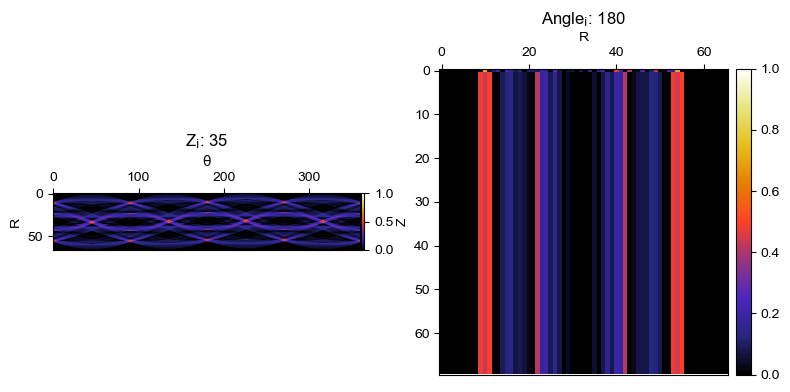

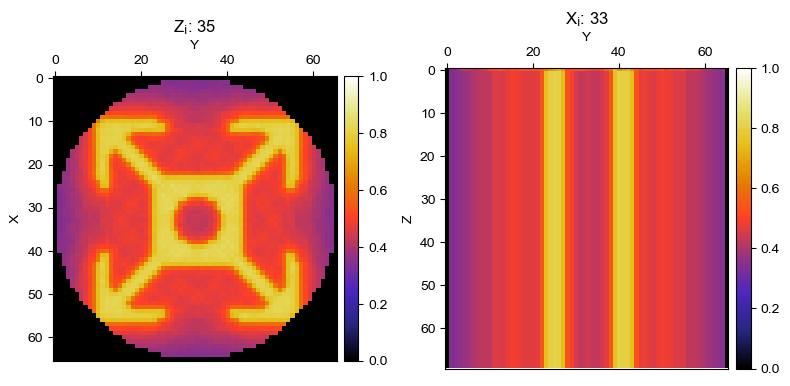

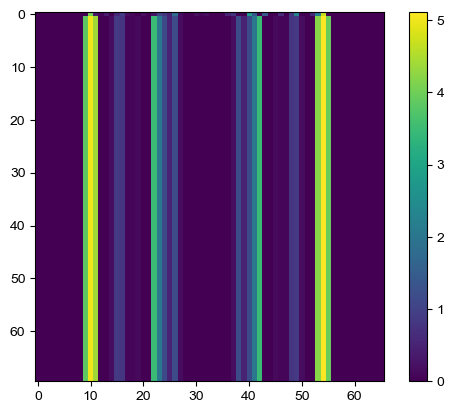

Saving image 0000/0359
Saving image 0001/0359
Saving image 0002/0359
Saving image 0003/0359
Saving image 0004/0359
Saving image 0005/0359
Saving image 0006/0359
Saving image 0007/0359
Saving image 0008/0359
Saving image 0009/0359
Saving image 0010/0359
Saving image 0011/0359
Saving image 0012/0359
Saving image 0013/0359
Saving image 0014/0359
Saving image 0015/0359
Saving image 0016/0359
Saving image 0017/0359
Saving image 0018/0359
Saving image 0019/0359
Saving image 0020/0359
Saving image 0021/0359
Saving image 0022/0359
Saving image 0023/0359
Saving image 0024/0359
Saving image 0025/0359
Saving image 0026/0359
Saving image 0027/0359
Saving image 0028/0359
Saving image 0029/0359
Saving image 0030/0359
Saving image 0031/0359
Saving image 0032/0359
Saving image 0033/0359
Saving image 0034/0359
Saving image 0035/0359
Saving image 0036/0359
Saving image 0037/0359
Saving image 0038/0359
Saving image 0039/0359
Saving image 0040/0359
Saving image 0041/0359
Saving image 0042/0359
Saving imag

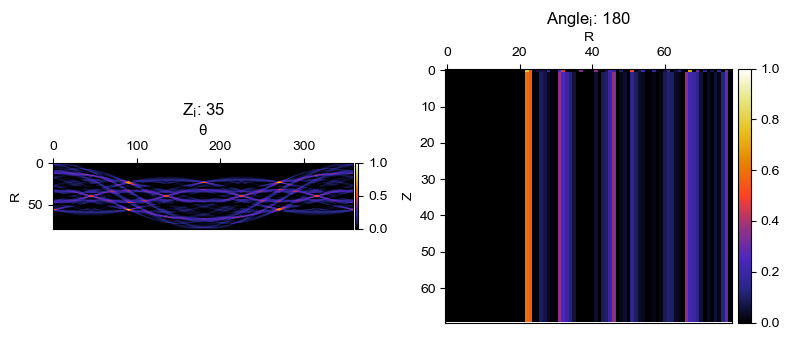

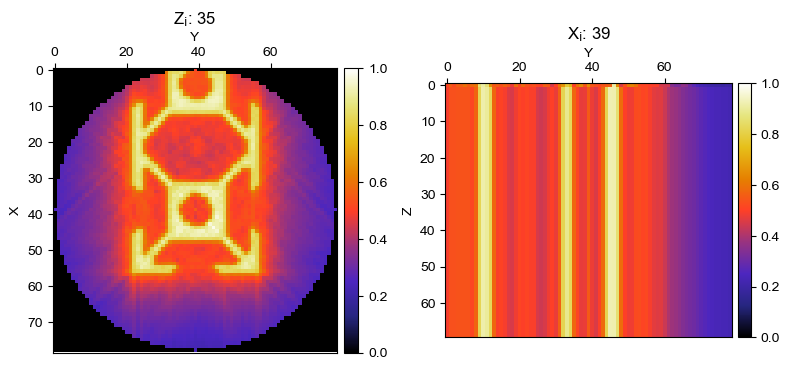

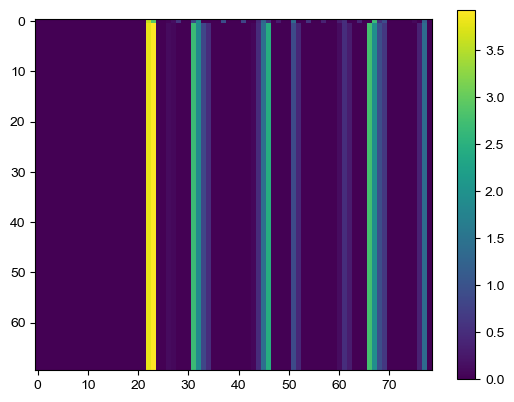

Saving image 0000/0359
Saving image 0001/0359
Saving image 0002/0359
Saving image 0003/0359
Saving image 0004/0359
Saving image 0005/0359
Saving image 0006/0359
Saving image 0007/0359
Saving image 0008/0359
Saving image 0009/0359
Saving image 0010/0359
Saving image 0011/0359
Saving image 0012/0359
Saving image 0013/0359
Saving image 0014/0359
Saving image 0015/0359
Saving image 0016/0359
Saving image 0017/0359
Saving image 0018/0359
Saving image 0019/0359
Saving image 0020/0359
Saving image 0021/0359
Saving image 0022/0359
Saving image 0023/0359
Saving image 0024/0359
Saving image 0025/0359
Saving image 0026/0359
Saving image 0027/0359
Saving image 0028/0359
Saving image 0029/0359
Saving image 0030/0359
Saving image 0031/0359
Saving image 0032/0359
Saving image 0033/0359
Saving image 0034/0359
Saving image 0035/0359
Saving image 0036/0359
Saving image 0037/0359
Saving image 0038/0359
Saving image 0039/0359
Saving image 0040/0359
Saving image 0041/0359
Saving image 0042/0359
Saving imag

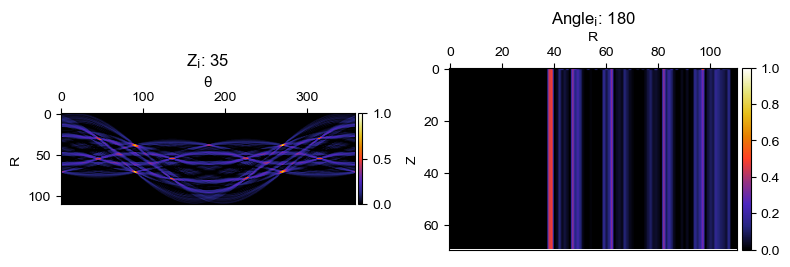

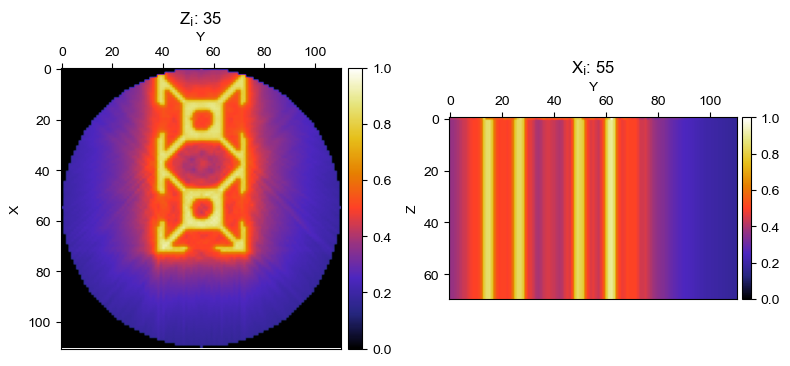

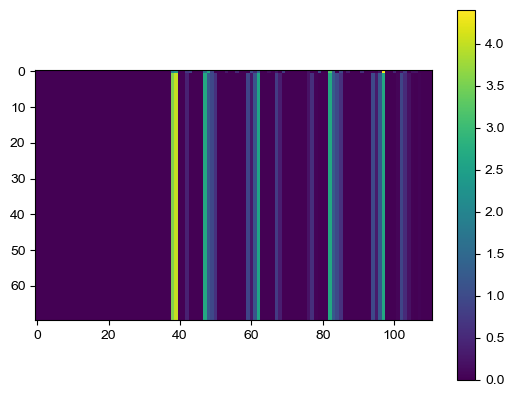

Exception: Image could not be inserted because it is either too large in the u-dimension or the offset causes it to extend out of the input screen size

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
def savePreProjections(b, save_dir: str, image_prefix: str = "image", image_type: str = ".png"):
    for k in range(len(b[0, :, 0])):
        save_path = os.path.join(save_dir, f"{image_prefix}{str(k).zfill(4)}{image_type}")
        image = b[:, k, :]
        
        # Normalize the pixel values to the range [0, 255]
        image_normalized = (image - image.min()) * (255.0 / (image.max() - image.min()))
        
        # Convert to integer type and create the image
        im = Image.fromarray(image_normalized.astype('uint8')).convert('L')
        
        im.save(save_path, subsampling=0, quality=100)
        print(f"Saving image {str(k).zfill(4)}/{str(len(b[0])).zfill(4)}")


# Rest of the code...

for i in range(len(dir_list)):
    targetgeo = vam.geometry.TargetGeometry(stlfilename=InputFolder + dir_list[i], resolution=resolution)
    # targetgeo.show()

    # Set output name to match the STL input file
    OutputPrefix = os.path.splitext(dir_list[i])[0]

    # Can we put this in calculated settings?
    proj_geo = vam.geometry.ProjectionGeometry(angles, ray_type='parallel', CUDA=True)

    b = vam.optimize.returnPreOptimize(targetgeo, proj_geo, optimizer_params)
    opt_sino, opt_recon, error = vam.optimize.optimize(targetgeo, proj_geo, optimizer_params)

    opt_sino.show()
    opt_recon.show()
    slice_2d = b[:, 180, :].T  # Selecting the first 100 rows from the second dimension
    plt.imshow(slice_2d)
    plt.colorbar()  # Optional: Add a colorbar to the plot
    plt.show()

    # Save images
    image_seq = vam.imagesequence.ImageSeq(image_config=iconfig0, sinogram=opt_sino)
    image_seq.saveAsImages(save_dir=OutputFolder, image_prefix=OutputPrefix)
    savePreProjections(b, save_dir=PreProjectionFolder, image_prefix=OutputPrefix)
